In [34]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

In [40]:
def pendulo(a, t, gamma, omega):
    y = a[0]
    v = a[1]
    dydt = v
    dvdt = -gamma * v - omega**2 * y
    return [dydt, dvdt]


def euler(a, b, y0, v0, gamma, omega, N = 500):

    h = (b - a) / N
    t = np.linspace(a, b, N+1)

    y_ = np.zeros(N+1)
    v_ = np.zeros(N+1)

    y_[0] = y0
    v_[0] = v0

    for i in range(N):

        y_[i+1] = y_[i] + h * v_[i]
        v_[i+1] = v_[i] + h * (-gamma * v_[i] - omega**2 * y_[i])

    return t_, y_, v_

In [36]:
# Condiciones iniciales
gamma = 0.2
omega = 1.0
y0 = 1.0
v0 = 0.0
N = 1000
t_ = np.linspace(0, 10, N)
a = np.array([y0,v0])

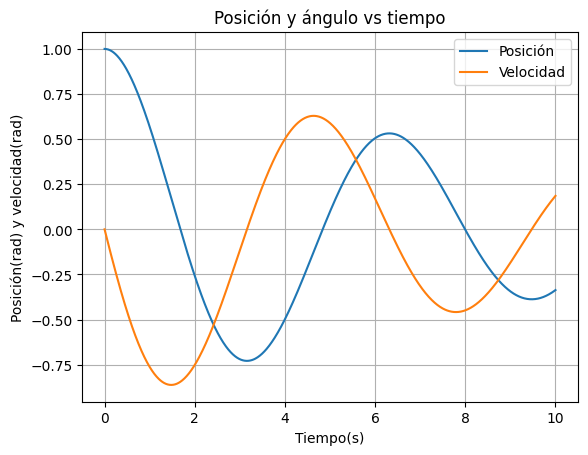

In [37]:
#Solución
sol = odeint(pendulo,a, t_, args=(gamma, omega))

#Graficas
plt.plot(t_,sol[:,0],label=r'Posición')
plt.plot(t_,sol[:,1],label=r'Velocidad')
plt.title('Posición y ángulo vs tiempo')
plt.xlabel('Tiempo(s)')
plt.ylabel('Posición(rad) y velocidad(rad)')
plt.grid()
plt.legend()

Euler

In [42]:
#Condiciones iniciales
a = 0
b = 10
y0 = 1.
v0 = 0.
gamma = 0.2
omega = 1.0

# Resolver
t_, y_, v_ = euler(a, b, y0, v0, gamma, omega)

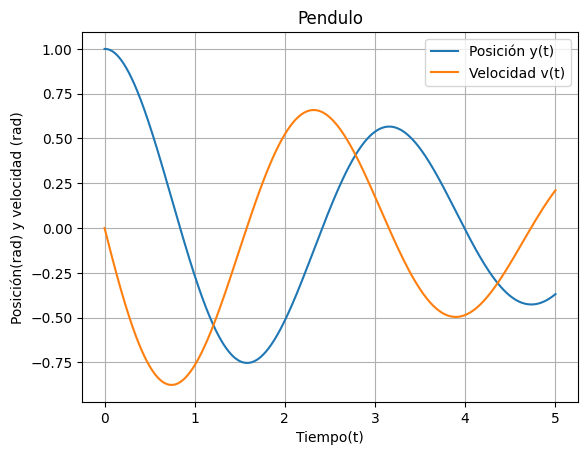

In [45]:
# Grafica
plt.plot(t_[:501], y_, label="Posición y(t)")
plt.plot(t_[:501], v_, label="Velocidad v(t)")
plt.xlabel("Tiempo(t)")
plt.ylabel("Posición(rad) y velocidad (rad)")
plt.legend()
plt.grid()
plt.title("Pendulo")
plt.show()